In [1]:
import numpy as np
import pandas as pd

data_path = '../data/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

열 객체일떄는 dt.year 이런식으로 사용. 단일 객체일때는 Timestamp에서 바로 .year 이런식으로 사용.

In [5]:
train['datetime'][1],pd.to_datetime(train['datetime'][1]),pd.to_datetime(train['datetime'][1]).year

('2011-01-01 01:00:00', Timestamp('2011-01-01 01:00:00'), 2011)

In [6]:
train['date'] = pd.to_datetime(train['datetime'])

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['hour'] = train['date'].dt.hour
train['minute'] = train['date'].dt.minute
train['second'] = train['date'].dt.second

train[['datetime', 'date','day']].head()

,datetime,date,day
0,2011-01-01 00:00:00,2011-01-01 00:00:00,1
1,2011-01-01 01:00:00,2011-01-01 01:00:00,1
2,2011-01-01 02:00:00,2011-01-01 02:00:00,1
3,2011-01-01 03:00:00,2011-01-01 03:00:00,1
4,2011-01-01 04:00:00,2011-01-01 04:00:00,1


In [7]:
train['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [8]:
import calendar

train['weekday']=train['date'].apply(
    lambda dateString:
    calendar.day_name[dateString.weekday()]
)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,0,0,Saturday


In [9]:
train['season'].unique(), train['weather'].unique()

(array([1, 2, 3, 4], dtype=int64), array([1, 2, 3, 4], dtype=int64))

In [10]:
train['season'] = train['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

train['weather'] = train['weather'].map({
    1: 'Clear', 2:'Mist, Few clouds', 3:'Light Snow, Rain, Thunderstom, Heavy Rain, Thunderstrom, Snow, Fog'
})
train[["season","weather"]].head()

,season,weather
0,Spring,Clear
1,Spring,Clear
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear


In [11]:
!where python


c:\ProgramData\Anaconda3\python.exe
C:\Users\cbj41\AppData\Local\Microsoft\WindowsApps\python.exe


In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

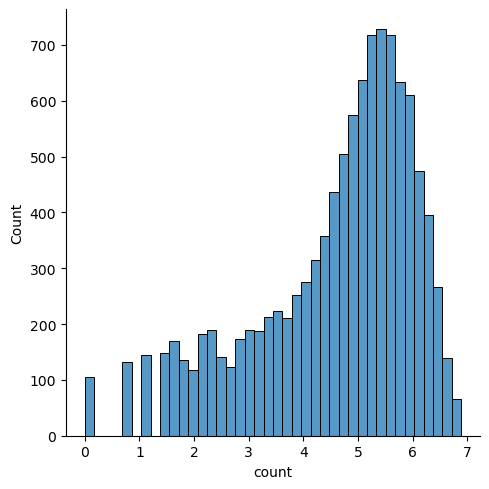

In [13]:
mpl.rc('font', size= 10)
# sns.displot(train['count'])
sns.displot(np.log(train['count']))

[Text(0.5, 1.0, 'Rental amounts by second')]

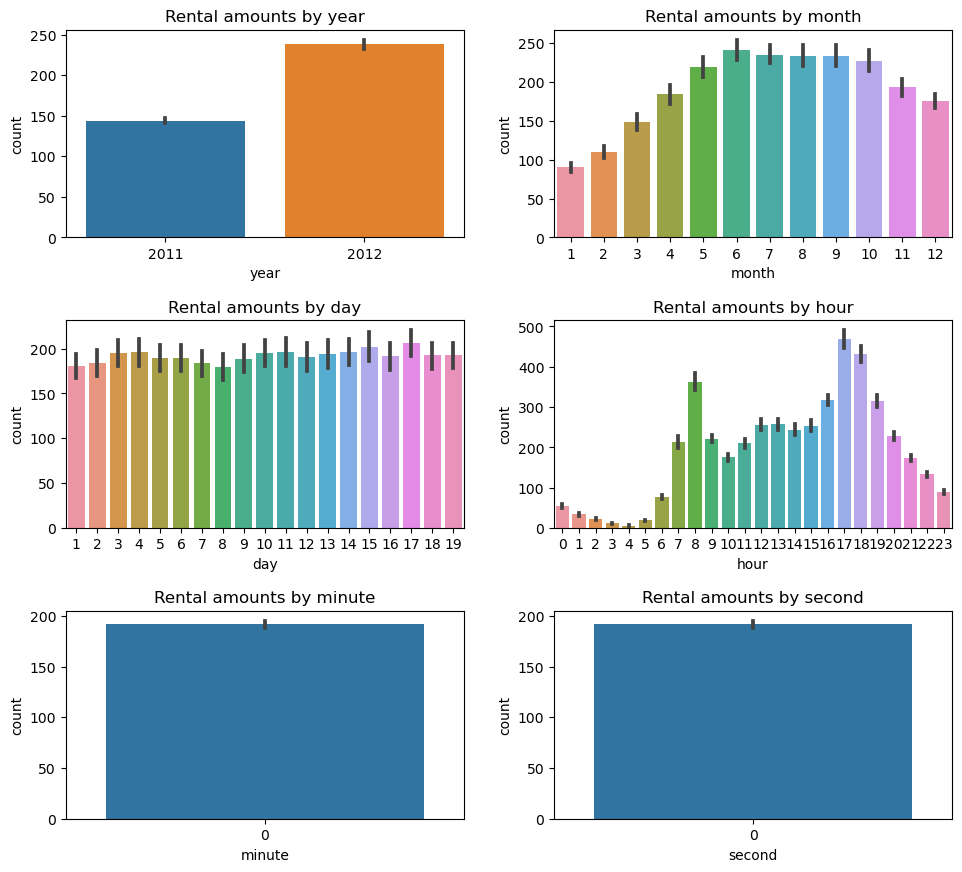

In [15]:
mpl.rc('font', size=10)
mpl.rc('axes', titlesize = 12)
figure, axes = plt.subplots(nrows=3,ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count',data=train, ax=axes[0,0])
sns.barplot(x='month',y='count',data=train, ax= axes[0,1])
sns.barplot(x='day', y='count',data=train, ax=axes[1,0])
sns.barplot(x='hour',y='count',data=train, ax= axes[1,1])
sns.barplot(x='minute', y='count',data=train, ax=axes[2,0])
sns.barplot(x='second',y='count',data=train, ax= axes[2,1])

axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rental amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')
axes[2,0].set(title = 'Rental amounts by minute')
axes[2,1].set(title = 'Rental amounts by second')